In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import yfinance as yf
from matplotlib import pyplot as plt

In [6]:
df = yf.download("IGE", start='2001-11-26', end='2007-11-14')

[*********************100%***********************]  1 of 1 completed


IGE only has divident adjastment.

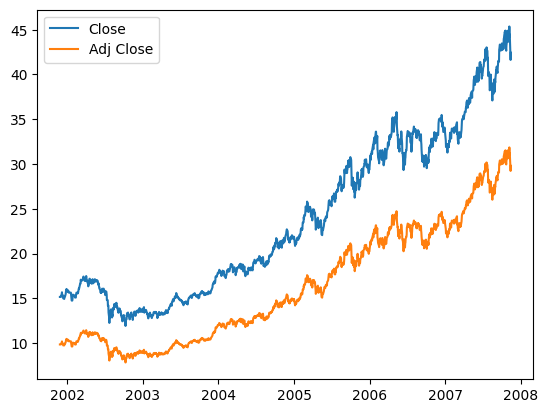

In [9]:
fig, ax = plt.subplots()
ax.plot(df["Close"], label="Close")
ax.plot(df["Adj Close"], label="Adj Close")
ax.legend()

In [13]:
# Strategy: Buying and holding a share since the close of November 26, 2001
# and selling it at close of November 14, 2007. Assume the average risk-free
# rate during this period is 4 percent per annum.
dailyret = df.loc[:, 'Adj Close'].pct_change() # Daily returns
excessRet = dailyret - 0.04 / 252 # Excess daily returns = strategy returns - financing cost, assuming risk-free rate of 4%
sharpeRatio = np.sqrt(252) * np.mean(excessRet) / np.std(excessRet)
sharpeRatio

0.7871676003888691

In [ ]:
# Strategy 2: Long-short market neutral strategy. At the time we bought IGE, 
# we just shorted an equal dollar aount of Standard $ Poor's depositary receipts as
# a hedge, and close both positions at the same time in November 2007.